In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv


# Importing Libraries and Loading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv")

# Numerical Analysis

In [4]:
# How does our data look like ?
df.sample(5)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
148,Liver Cancer,Yes,No,Yes,Yes,42,Male,Normal,Low,Negative
276,Coronary Artery Disease,Yes,Yes,No,No,60,Male,High,High,Negative
145,Depression,Yes,No,No,Yes,42,Male,High,Normal,Negative
93,Spina Bifida,No,No,Yes,No,35,Female,Normal,Normal,Positive
264,Osteoporosis,Yes,No,Yes,Yes,55,Male,High,Low,Positive


In [5]:
# Checking Data Types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
#checking for null values
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
# What is the size of dataset
df.shape

(349, 10)

In [8]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [9]:
#let's check for number of unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

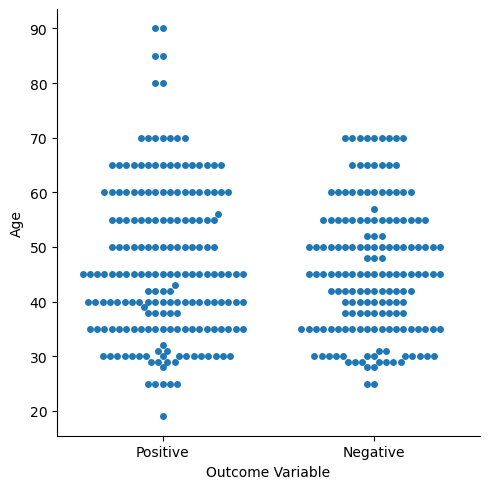

In [10]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df , kind = "swarm")    

### People in old ages have a higher probability of being tested positive for diseases which is an outlier for our dataset

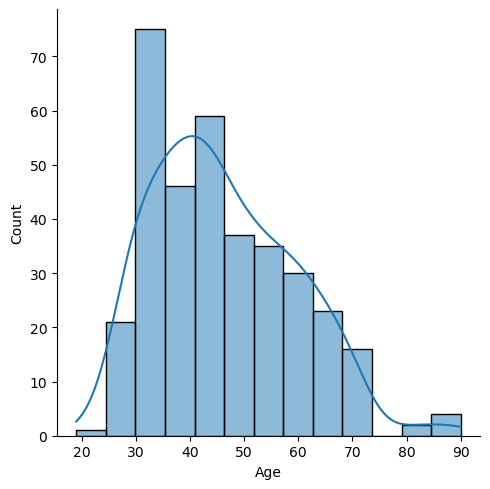

In [11]:
sns.displot(df['Age'] , kde=True)

### There is no major skewness in the dataset with a few outliers

<Axes: >

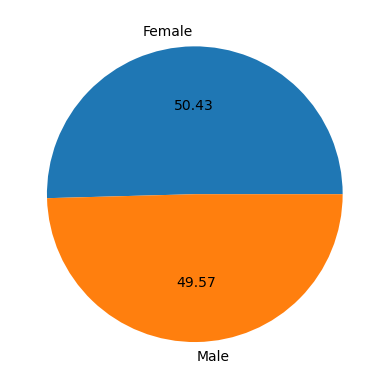

In [12]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

### The dataset is quite evenly distributed based on gender

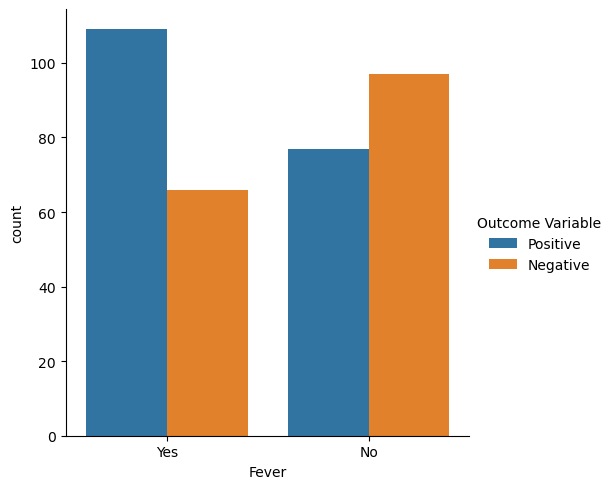

In [13]:
sns.catplot(x='Fever' , kind='count',data=df , hue = "Outcome Variable")

### Having Fever is a major indication of a positive diagnosis

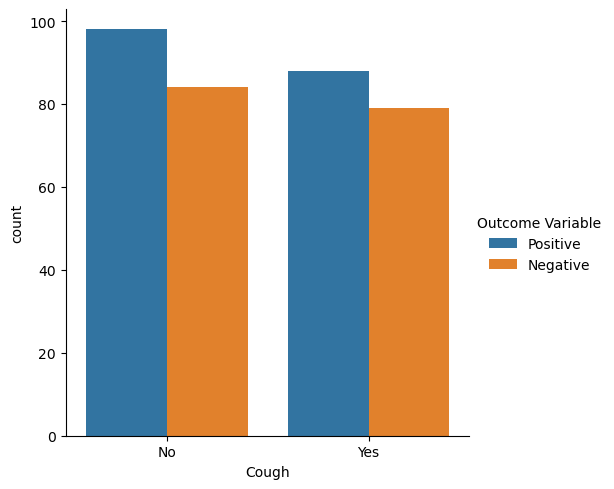

In [14]:
sns.catplot(x='Cough' , kind='count',data=df , hue = "Outcome Variable")

### Nothing major can be inferred from cough as it is quite common

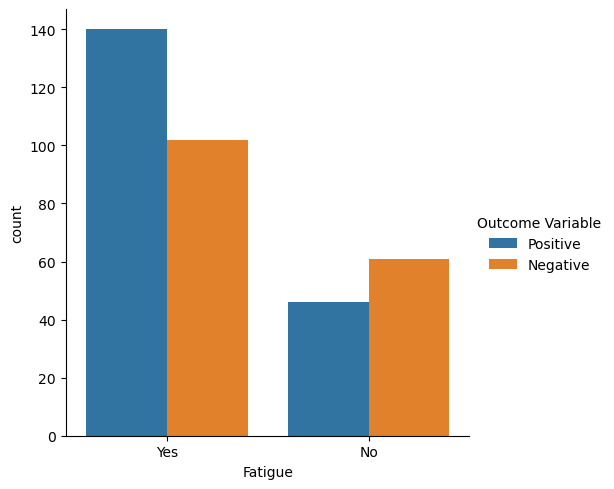

In [15]:
sns.catplot(x='Fatigue' , kind='count',data=df , hue = "Outcome Variable")

### A lot of people irrespective of positive or negative experience a lot of fatique

<Axes: >

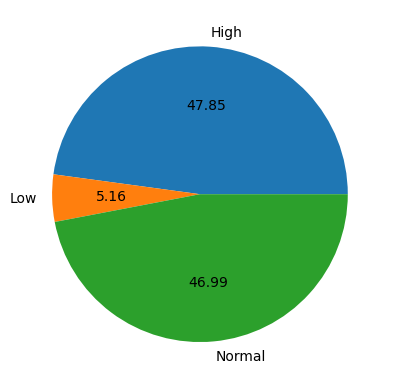

In [16]:
df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

### Majority of the subjects have a normal or high blood pressure

<Axes: >

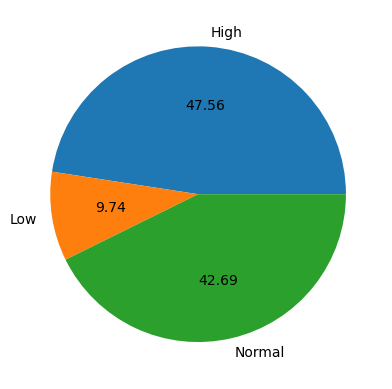

In [17]:
df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

### Majority of the people have high cholestrol and low cholestrol is quite rare

# Classification Model

Let's assume the name of disease irrelevant for this case study to see if general disease diagnosis along with classification algorithms can help to detect diseases


In [18]:
#dropping name column
df = df.iloc[:,1:]

In [19]:
df.tail()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Yes,No,Yes,No,80,Female,High,High,Positive
345,Yes,No,Yes,No,85,Male,High,High,Positive
346,Yes,No,Yes,No,85,Male,High,High,Positive
347,Yes,No,Yes,No,90,Female,High,High,Positive
348,Yes,No,Yes,No,90,Female,High,High,Positive


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:8],df.iloc[:,-1],
                                                test_size=0.2)

In [22]:
x_train.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
123,Yes,Yes,No,Yes,40,Female,Normal,Normal
124,No,No,Yes,Yes,40,Male,High,High
52,Yes,No,Yes,Yes,31,Male,High,High
65,Yes,Yes,Yes,No,35,Female,High,Normal
135,No,No,Yes,No,40,Female,High,High


# Encoding Categorical Data

In [23]:
#importing libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [24]:
oe = OrdinalEncoder(categories=[['No','Yes']])
x_train_fever = oe.fit_transform(x_train["Fever"].array.reshape(-1, 1))
x_test_fever = oe.transform(x_test["Fever"].array.reshape(-1, 1))

In [25]:
be = OrdinalEncoder(categories=[['No','Yes']])
x_train_cough = be.fit_transform(x_train["Cough"].array.reshape(-1, 1))
x_test_cough = be.transform(x_test["Cough"].array.reshape(-1, 1))

In [26]:
ce = OrdinalEncoder(categories=[['No','Yes']])
x_train_fat = ce.fit_transform(x_train["Fatigue"].array.reshape(-1, 1))
x_test_fat = ce.transform(x_test["Fatigue"].array.reshape(-1, 1))

In [27]:
de = OrdinalEncoder(categories=[['No','Yes']])
x_train_breath = de.fit_transform(x_train["Difficulty Breathing"].array.reshape(-1, 1))
x_test_breath = de.transform(x_test["Difficulty Breathing"].array.reshape(-1, 1))

In [28]:
fe = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_blood = fe.fit_transform(x_train["Blood Pressure"].array.reshape(-1, 1))
x_test_blood = fe.transform(x_test["Blood Pressure"].array.reshape(-1, 1))

In [29]:
ge = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_chol = ge.fit_transform(x_train["Cholesterol Level"].array.reshape(-1, 1))
x_test_chol = ge.transform(x_test["Cholesterol Level"].array.reshape(-1, 1))

In [30]:
ohe = OneHotEncoder(drop='first',sparse=False)
x_train_gender = ohe.fit_transform(x_train['Gender'].array.reshape(-1, 1))
x_test_gender = ohe.transform(x_test['Gender'].array.reshape(-1, 1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
x_train_transformed = np.concatenate((x_train_fever,x_train_cough,x_train_fat,x_train_breath,x_train_blood,x_train_chol,x_train_gender),axis=1)

x_test_transformed = np.concatenate((x_test_fever,x_test_cough,x_test_fat,x_test_breath,x_test_blood,x_test_chol,x_test_gender),axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [34]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Decision Trees


In [35]:
#importing library
from sklearn import tree

In [36]:
#implementing decision trees
dtr = tree.DecisionTreeClassifier()
dtr.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [37]:
#predicting values and testing accuracy
from sklearn.metrics import accuracy_score
dpred=dtr.predict(x_test_transformed)
accuracy_score(dpred,y_test)

0.6714285714285714

# Random Forests

In [38]:
#importing library
from sklearn.ensemble import RandomForestClassifier

In [39]:
#implementing random forests
rfr = RandomForestClassifier()
rfr.fit(x_train_transformed,y_train)

RandomForestClassifier()

In [40]:
#predicting values and testing accuracy
fpred=rfr.predict(x_test_transformed)
accuracy_score(fpred,y_test)

0.6

# Logistic Regression

In [41]:
# importing libraries
from sklearn.linear_model import LogisticRegression

In [42]:
#implementing Logistic Regression
lreg = LogisticRegression()
lreg.fit(x_train_transformed,y_train)

LogisticRegression()

In [43]:
# predicting values and checking accuracy
lpred = lreg.predict(x_test_transformed)
accuracy_score(lpred , y_test)

0.6714285714285714

# KNN

In [44]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#implementing KNN
knn = KNeighborsClassifier()
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [46]:
#predicting values and testing accuracy
kpred = knn.predict(x_test_transformed)
accuracy_score(kpred,y_test)

0.7142857142857143

# SVM

In [47]:
# importing library
from sklearn import svm

In [48]:
#implementing SVM
sv = svm.SVC()
sv.fit(x_train_transformed,y_train)

SVC()

In [49]:
#predicting values and testing accuracy
spred = sv.predict(x_test_transformed)
accuracy_score(spred,y_test)

0.6714285714285714

# Naive Bayes

In [50]:
#importing library
from sklearn.naive_bayes import GaussianNB

In [51]:
#implementing naive bayes
nb = GaussianNB()
nb.fit(x_train_transformed,y_train)

GaussianNB()

In [52]:
#predicting values and testing accuracy
npred = nb.predict(x_test_transformed)
accuracy_score(npred,y_test)

0.6714285714285714

# Conclusion

#### The main goal of this notebook was to implement different types of classification techniques in a simple manner for a beginner to refer and understand. Any Feedback and upvotes are highly appreciated :)

### Here's the accuracy of different classification models

#### Decision Tree : 0.7142857142857143
#### Random Forest : 0.7142857142857143
#### Logistic Regression : 0.6
#### KNN : 0.6571428571428571
#### SVM: 0.6571428571428571
#### Naive Bayes: 0.6285714285714286